In [ ]:
import pandas as pd
import signac
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
from collections import OrderedDict
%matplotlib inline
import matplotlib.patches as mpatches
import matplotlib.lines as mlines

path = "/home/mikehenry/epoxy-stuff/doc_test_enth"

project = signac.get_project(path)
jobs = project.find_jobs(filter={"bond": True}, doc_filter={"cure_percent":{"$gte":80}})

exp_data = np.load("../exp_data.npz")
doc, pa, sa, ta = exp_data["arr_0"], exp_data["arr_1"], exp_data["arr_2"], exp_data["arr_3"]

for job in jobs:
    try:
        df = pd.read_csv(job.fn("_test_species.log"), delimiter="\t")
    except(FileNotFoundError):
        continue
    cure_fractions = np.asarray(df["#doc"])
    primaryA_cnts = np.asarray(df["primaryA"]) # 0
    secondaryA_cnts = np.asarray(df["secondaryA"]) # 1
    ternaryA_cnts = np.asarray(df["ternaryA"]) # 2 
    quarternaryA_cnts = np.asarray(df["quarternaryA"]) # 3
    fivernaryA_cnts = np.asarray(df["fivernaryA"]) # 4
    scale_factor = primaryA_cnts[0]*2
    primaryA_cnts=primaryA_cnts/scale_factor # 0
    secondaryA_cnts=secondaryA_cnts/scale_factor # 1
    ternaryA_cnts=ternaryA_cnts/scale_factor # 2
    quarternaryA_cnts=quarternaryA_cnts/scale_factor # 3
    fivernaryA_cnts=fivernaryA_cnts/scale_factor # 4

    P_high = primaryA_cnts*2+secondaryA_cnts+ternaryA_cnts
    P_low =  primaryA_cnts*2+secondaryA_cnts+ternaryA_cnts*0

    S_high = secondaryA_cnts + ternaryA_cnts*2 + quarternaryA_cnts
    S_low =  secondaryA_cnts + ternaryA_cnts*0 +quarternaryA_cnts

    T_high = ternaryA_cnts+quarternaryA_cnts+fivernaryA_cnts*2
    T_low = quarternaryA_cnts+fivernaryA_cnts*2
    
    plt.figure(dpi=300)

    plt.plot(cure_fractions, P_high, color='#1f77b4', linestyle=":", label="high")
    plt.plot(cure_fractions, P_low, color='#1f77b4', linestyle="--", label="low")

    #plt.plot(cure_fractions, T_high, color="#2ca02c")
    #plt.plot(cure_fractions, T_low, color="#2ca02c")

    plt.plot(cure_fractions, S_high, color="#ff7f0e", linestyle=":")
    plt.plot(cure_fractions, S_low, color="#ff7f0e", linestyle="--")




        #plt.fill_between(cure_fractions, S_low, S_high, label="Secondary",hatch="|||", alpha = 0.5, color="#ff7f0e")
        #plt.fill_between(cure_fractions, T_low, T_high, label="Tertiary",hatch="///", alpha = 0.5, color="#2ca02c")
        #plt.fill_between(cure_fractions, P_low, P_high, label="Primary",hatch="|", alpha = 0.8, color='#1f77b4')

        

    plt.plot(doc,pa, color='#1f77b4', linestyle='-', label="exp")
    plt.plot(doc,sa, color='#ff7f0e', linestyle='-')
    #plt.plot(doc,ta, color='#2ca02c', linestyle='--')

    primary = mpatches.Patch(color='#1f77b4', label='Primary Amine')
    seconday = mpatches.Patch(color='#ff7f0e', label='Secondary Amine')
    exp = mlines.Line2D([], [], color='grey', linestyle='-', label="Experiment Ref. XX")
    high = mlines.Line2D([], [], color='grey', linestyle=':', label="Simulation High Count")
    low = mlines.Line2D([], [], color='grey', linestyle='--', label="Simulation Low Count")



    handles, labels = plt.gca().get_legend_handles_labels()
    by_label = OrderedDict(zip(labels, handles))
    plt.legend(by_label.values(), by_label.keys(), prop={'size': 15})
    plt.legend(handles=[primary,seconday,exp, low, high])


    #plt.title("activation_energy: {} \n bond_period: {} deltaT: {} percent_bonds_per_step: {} \n sec_bond_weight: {}".format(job.sp.activation_energy,
    #                                             job.sp.bond_period,
    #                                             job.sp.deltaT,
    #                                            job.sp.percent_bonds_per_step,
    #                                            job.sp.sec_bond_weight),
    #                                            )
    
    plt.xlabel("Degree of Cure", size=15)
    plt.ylabel("Normalized Concentration", size=15)
    plt.xlim(0,1)
    plt.savefig("bulk_dgeba_plots/ea{}-bp{}-dt{}-pbps{}-sbw{}.png".format(job.sp.activation_energy,
                                                 job.sp.bond_period,
                                                 job.sp.deltaT,
                                               job.sp.percent_bonds_per_step,
                                                job.sp.sec_bond_weight), transparent=True)
    plt.show()

-----------
d9cea898472a440f1552ff654e3ee537
R2 SAFO 0.9944640855116473
Ea 5.0
deltaT 1e-05
sec_bond_weight 1.0
% bonds per step 0.01
bond period 1


/home/mikehenry/miniconda3/envs/epoxpy_env/lib/python3.5/site-packages/matplotlib/figure.py:2366: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


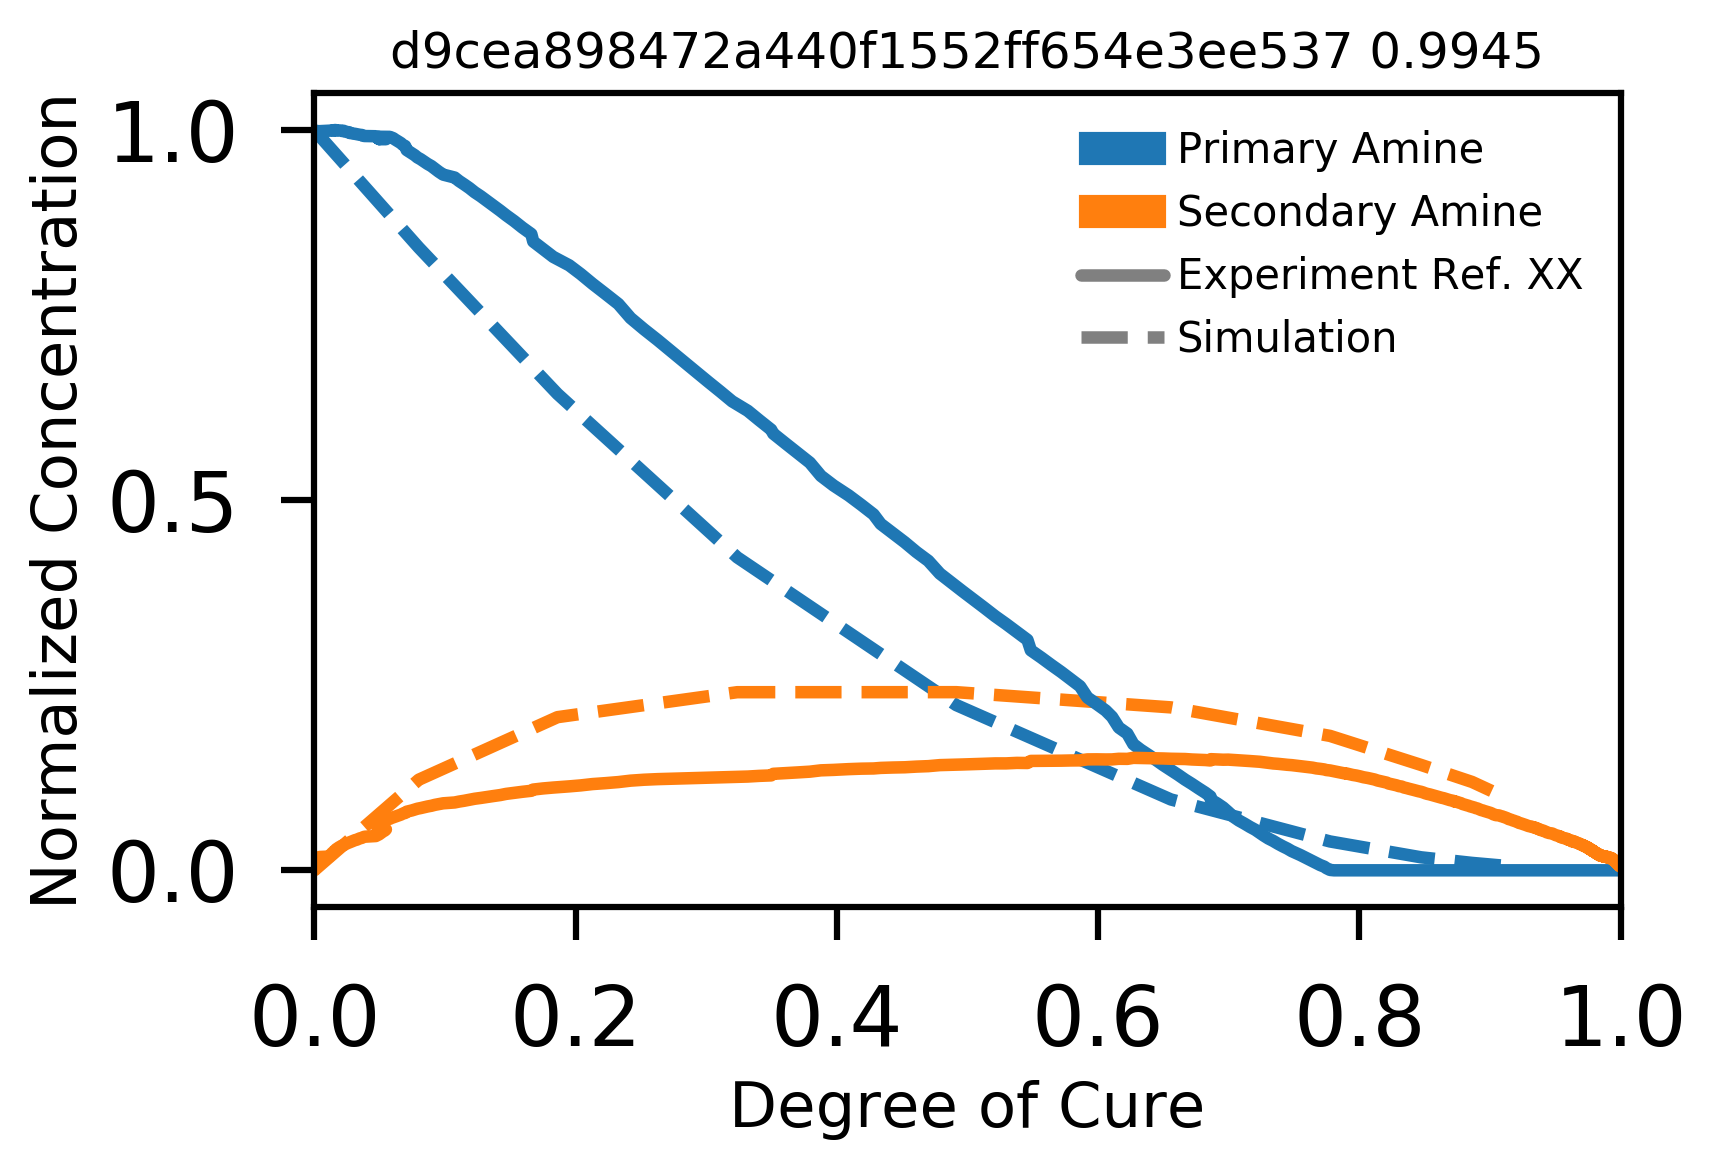

-----------
6daa1256ba6e38def384824187ea1e50
R2 SAFO 0.9943920672483405
Ea 5.0
deltaT 1e-05
sec_bond_weight 1.0
% bonds per step 1.0
bond period 100


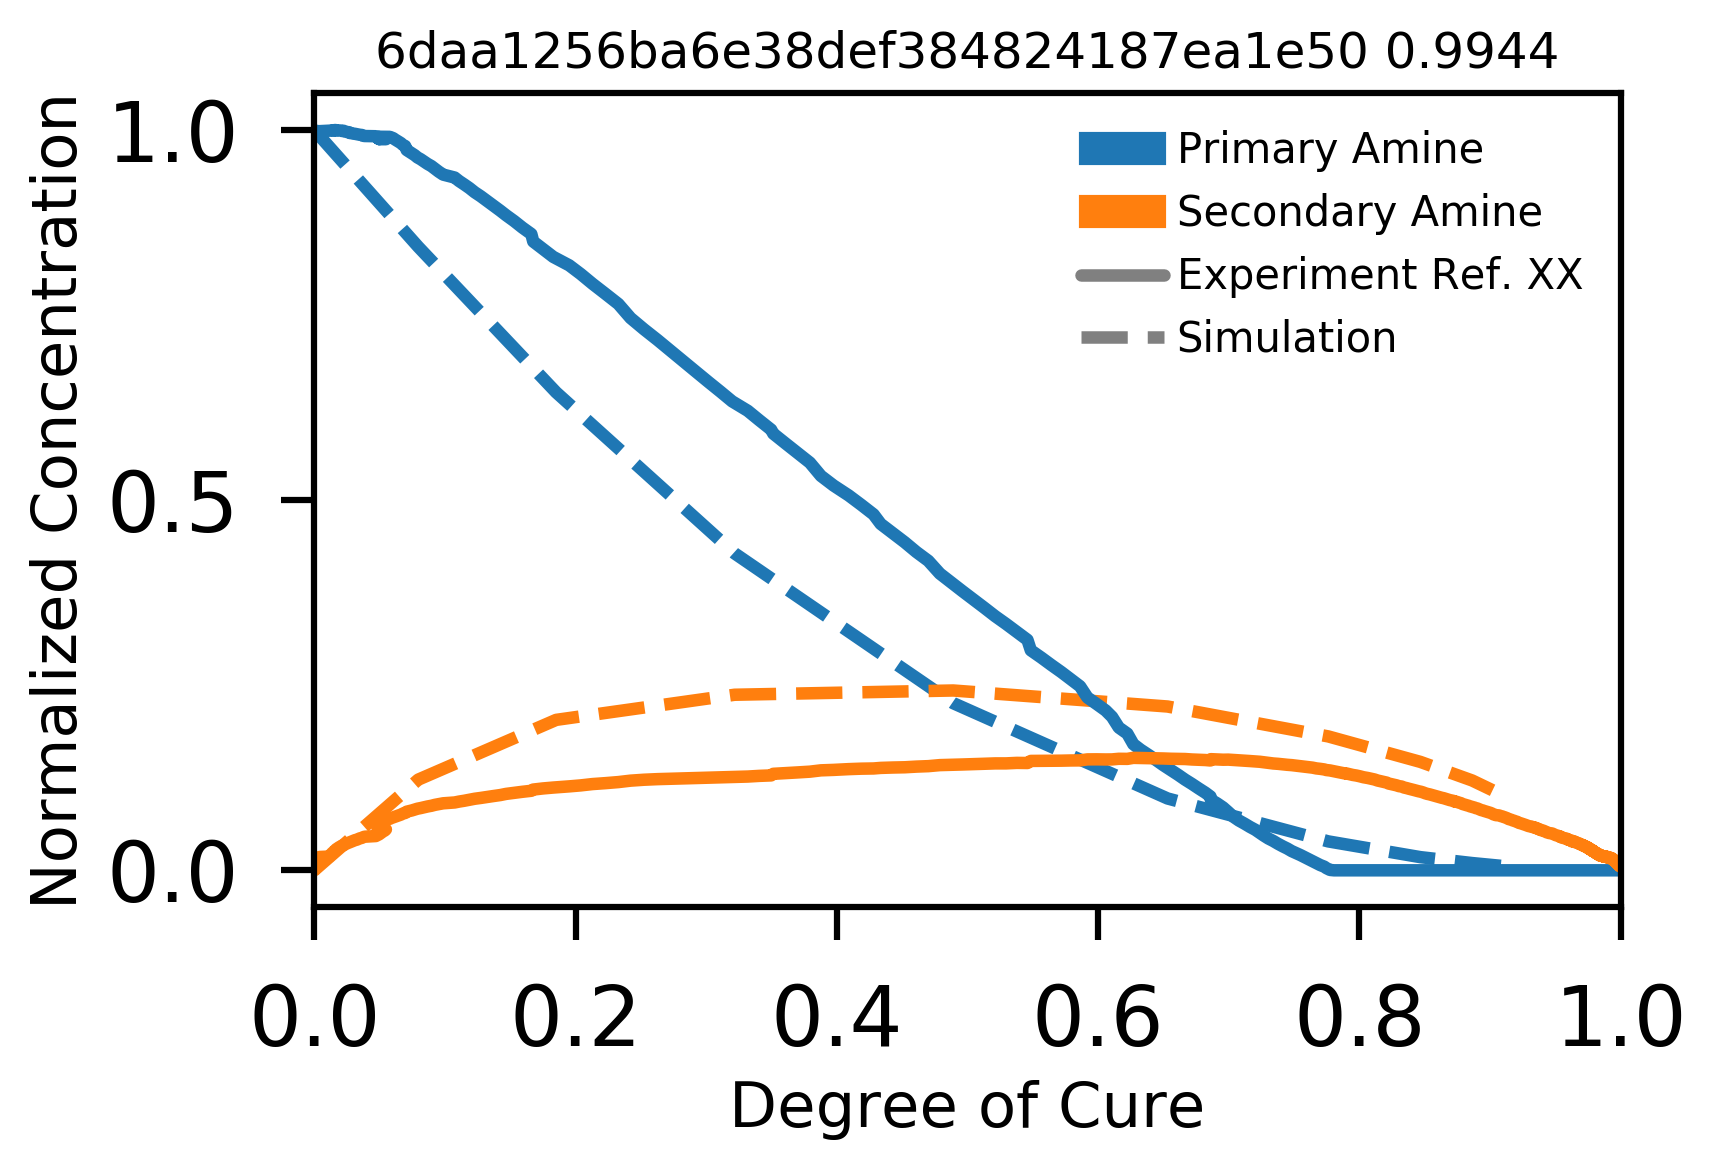

-----------
8758f0f1f6905e32d26d318297c909bc
R2 SAFO 0.9946959756339767
Ea 2.0
deltaT 1e-05
sec_bond_weight 1.0
% bonds per step 0.1
bond period 10


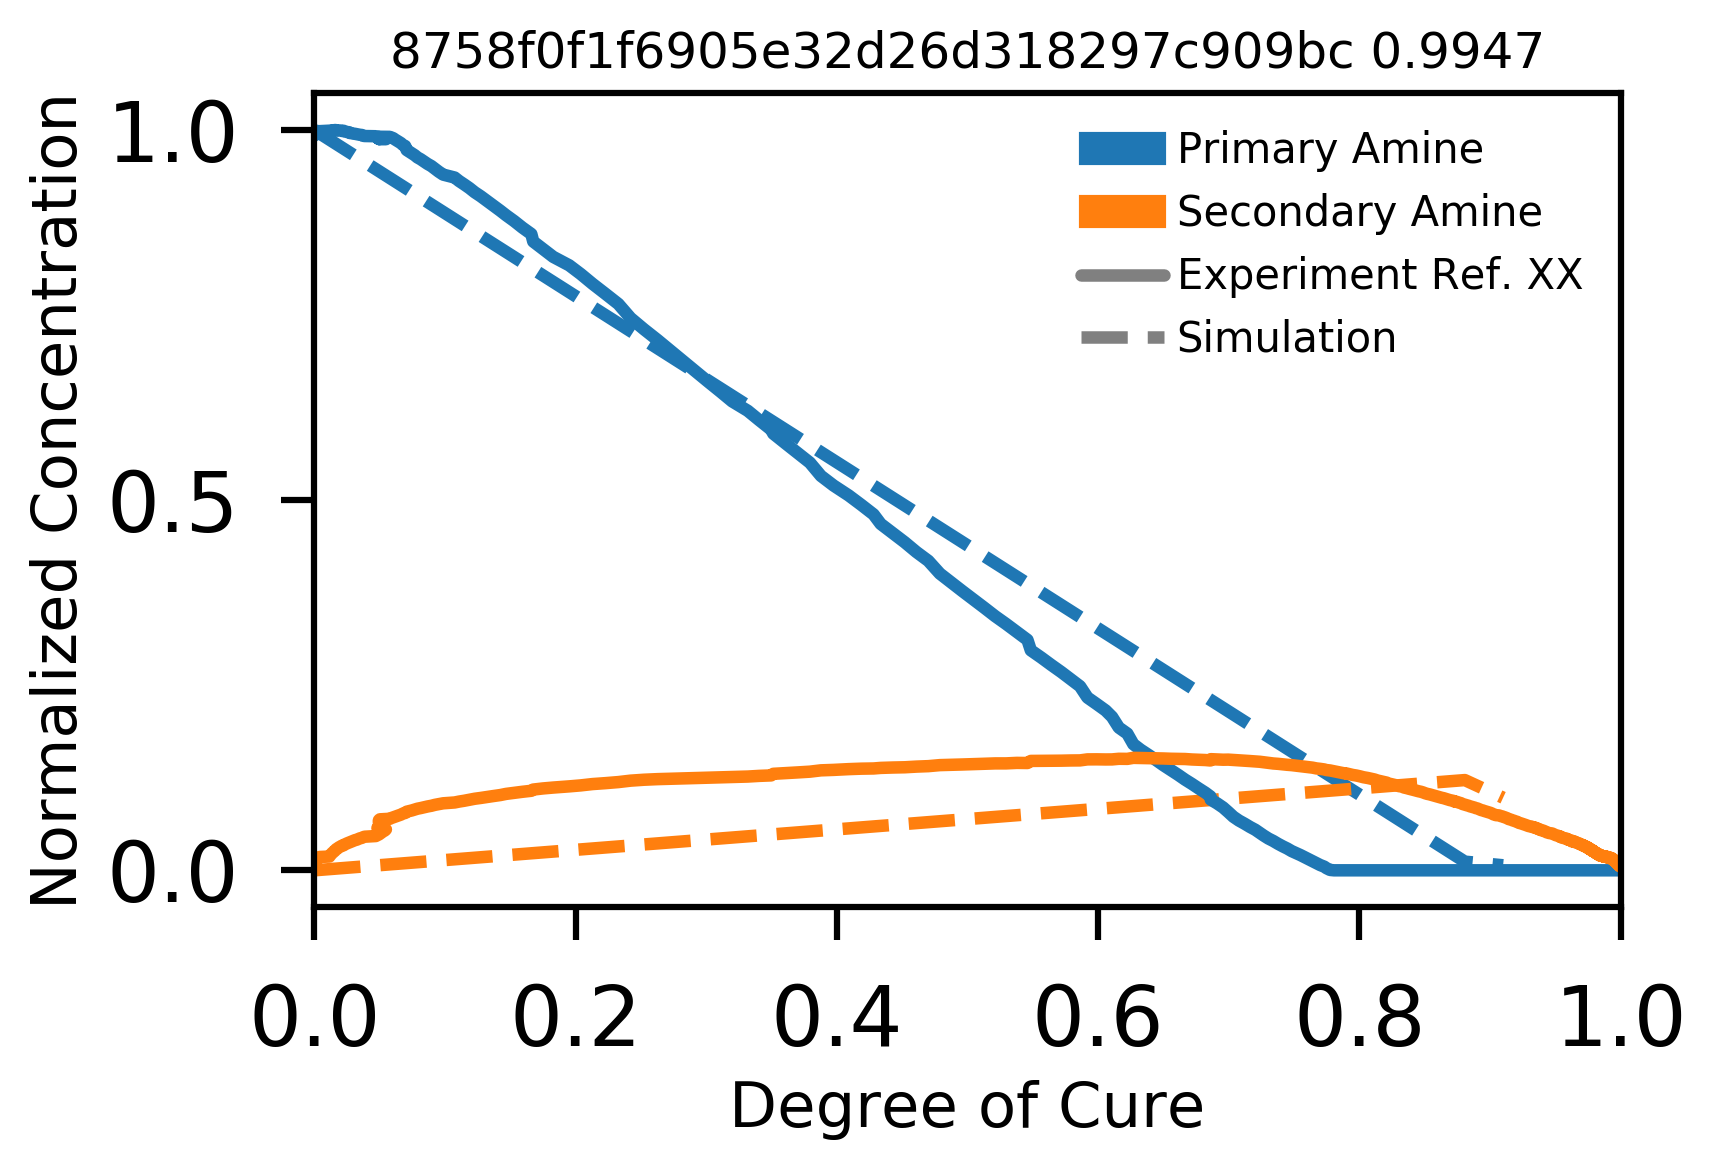

-----------
a7eb1d0c857d64934092052f48fcb388
R2 SAFO 0.9948052060045987
Ea 2.0
deltaT 1e-05
sec_bond_weight 1.0
% bonds per step 0.01
bond period 1


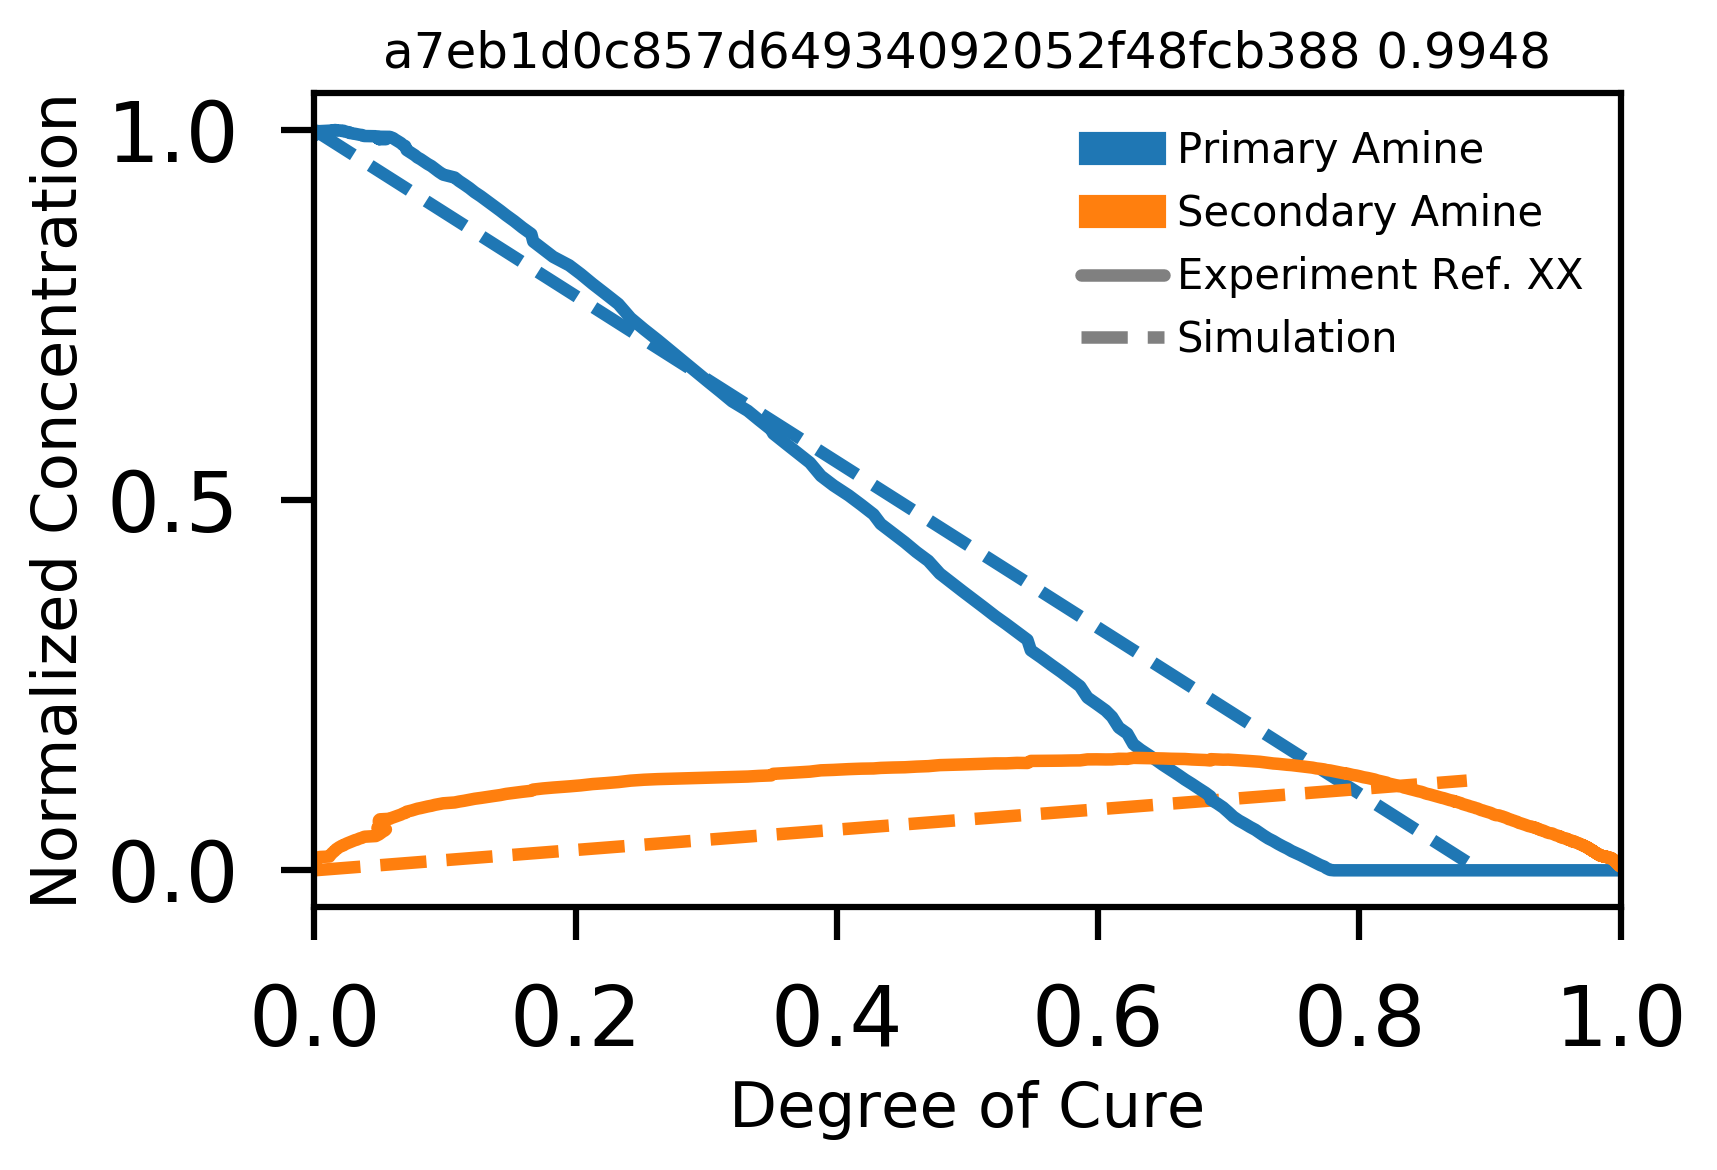

-----------
4ce7f69a05ea90e7ff34f8f9abc15f83
R2 SAFO 0.9949727019665672
Ea 2.0
deltaT 1e-05
sec_bond_weight 1.0
% bonds per step 1.0
bond period 100


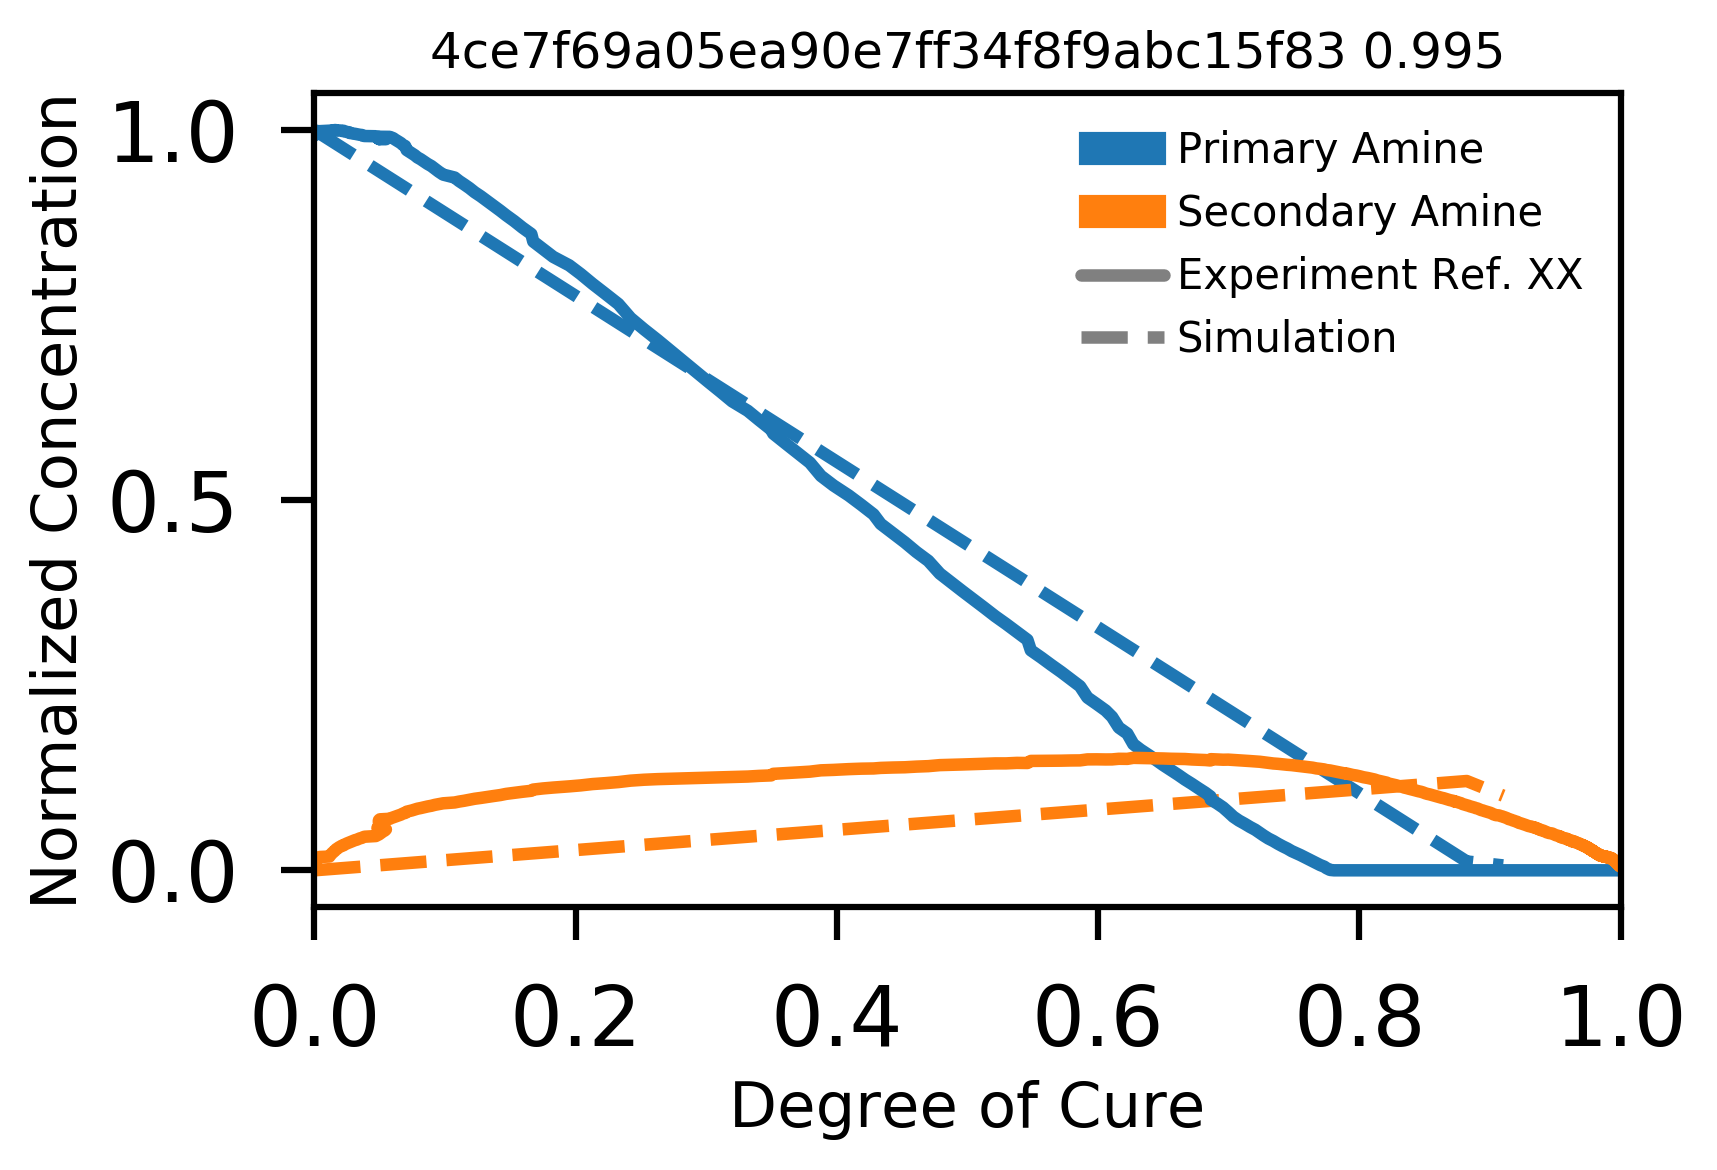

In [6]:
import pandas as pd
import signac
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
from collections import OrderedDict
%matplotlib inline
import matplotlib.patches as mpatches
import matplotlib.lines as mlines

path = "/home/mikehenry/epoxy-stuff/doc_test_enth"

project = signac.get_project(path)
jobs = project.find_jobs(filter={"bond": True}, doc_filter={"cure_percent":{"$gte":80}})

exp_data = np.load("../exp_data.npz")
doc, pa, sa, ta = exp_data["arr_0"], exp_data["arr_1"], exp_data["arr_2"], exp_data["arr_3"]


jobs = project.find_jobs(doc_filter={"cure_percent":{"$gte":80}})
R2s = []
for job in jobs:
    try:
        if job.doc.SAFO_model_R2 is not None:
            R2s.append((job.doc.SAFO_model_R2, job._id))
    except(AttributeError):
        continue
    
top_ten = [_[1] for _ in sorted(R2s)[-5:]]
'''
for job in jobs:
    if job._id in top_ten:
        print("-----------")
        print(job._id)
        print("R2 SAFO", job.doc.SAFO_model_R2)
        print("Ea", job.sp.activation_energy)
        print("deltaT", job.sp.deltaT)
        print("sec_bond_weight", job.sp.sec_bond_weight)
        print("% bonds per step" ,job.sp.percent_bonds_per_step)
        print("bond period", job.sp.bond_period)
'''
for job in jobs:
    if job._id in top_ten:
        try:
            df = pd.read_csv(job.fn("_test_species.log"), delimiter="\t")
        except(FileNotFoundError):
            continue
        print("-----------")
        print(job._id)
        print("R2 SAFO", job.doc.SAFO_model_R2)
        print("Ea", job.sp.activation_energy)
        print("deltaT", job.sp.deltaT)
        print("sec_bond_weight", job.sp.sec_bond_weight)
        print("% bonds per step" ,job.sp.percent_bonds_per_step)
        print("bond period", job.sp.bond_period)

        cure_fractions = np.asarray(df["#doc"])
        primaryA_cnts = np.asarray(df["primaryA"]) # 0
        secondaryA_cnts = np.asarray(df["secondaryA"]) # 1
        ternaryA_cnts = np.asarray(df["ternaryA"]) # 2 
        quarternaryA_cnts = np.asarray(df["quarternaryA"]) # 3
        fivernaryA_cnts = np.asarray(df["fivernaryA"]) # 4
        scale_factor = primaryA_cnts[0]*2
        primaryA_cnts=primaryA_cnts/scale_factor # 0
        secondaryA_cnts=secondaryA_cnts/scale_factor # 1
        ternaryA_cnts=ternaryA_cnts/scale_factor # 2
        quarternaryA_cnts=quarternaryA_cnts/scale_factor # 3
        fivernaryA_cnts=fivernaryA_cnts/scale_factor # 4

        P_high = primaryA_cnts*2+secondaryA_cnts+ternaryA_cnts
        P_low =  primaryA_cnts*2+secondaryA_cnts+ternaryA_cnts*0

        S_high = secondaryA_cnts + ternaryA_cnts*2 + quarternaryA_cnts
        S_low =  secondaryA_cnts + ternaryA_cnts*0 +quarternaryA_cnts

        T_high = ternaryA_cnts+quarternaryA_cnts+fivernaryA_cnts*2
        T_low = quarternaryA_cnts+fivernaryA_cnts*2

        plt.figure(dpi=300)

        #plt.plot(cure_fractions, P_high, color='#1f77b4', linestyle=":", label="high")
        plt.plot(cure_fractions, P_low, color='#1f77b4', linestyle="--", label="low")

        #plt.plot(cure_fractions, T_high, color="#2ca02c")
        #plt.plot(cure_fractions, T_low, color="#2ca02c")

        #plt.plot(cure_fractions, S_high, color="#ff7f0e", linestyle=":")
        plt.plot(cure_fractions, S_low, color="#ff7f0e", linestyle="--")




            #plt.fill_between(cure_fractions, S_low, S_high, label="Secondary",hatch="|||", alpha = 0.5, color="#ff7f0e")
            #plt.fill_between(cure_fractions, T_low, T_high, label="Tertiary",hatch="///", alpha = 0.5, color="#2ca02c")
            #plt.fill_between(cure_fractions, P_low, P_high, label="Primary",hatch="|", alpha = 0.8, color='#1f77b4')



        plt.plot(doc,pa, color='#1f77b4', linestyle='-', label="exp")
        plt.plot(doc,sa, color='#ff7f0e', linestyle='-')
        #plt.plot(doc,ta, color='#2ca02c', linestyle='--')

        primary = mpatches.Patch(color='#1f77b4', label='Primary Amine')
        seconday = mpatches.Patch(color='#ff7f0e', label='Secondary Amine')
        exp = mlines.Line2D([], [], color='grey', linestyle='-', label="Experiment Ref. XX")
        #high = mlines.Line2D([], [], color='grey', linestyle=':', label="Simulation High Count")
        low = mlines.Line2D([], [], color='grey', linestyle='--', label="Simulation")



        handles, labels = plt.gca().get_legend_handles_labels()
        by_label = OrderedDict(zip(labels, handles))
        plt.legend(by_label.values(), by_label.keys(), prop={'size': 15})
        plt.legend(handles=[primary,seconday,exp, low])


        #plt.title("activation_energy: {} \n bond_period: {} deltaT: {} percent_bonds_per_step: {} \n sec_bond_weight: {}".format(job.sp.activation_energy,
        #                                             job.sp.bond_period,
        #                                             job.sp.deltaT,
        #                                            job.sp.percent_bonds_per_step,
        #                                            job.sp.sec_bond_weight),
        #                                            )

        plt.title(str(job._id)+ " "+ str(round(job.doc.SAFO_model_R2,4)))
        plt.xlabel("Degree of Cure", size=15)
        plt.ylabel("Normalized Concentration", size=15)
        plt.xlim(0,1)
        plt.show()

In [3]:
job.doc.FO_model_R2

0.421453152073347

-----------
746472de5e6d55a1a9143590f71a59f4
R2 FO 0.9997788926075507
Ea 2.0
deltaT 1e-06
sec_bond_weight 1.0
% bonds per step 0.1
bond period 100


/home/mikehenry/miniconda3/envs/epoxpy_env/lib/python3.5/site-packages/matplotlib/figure.py:2366: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


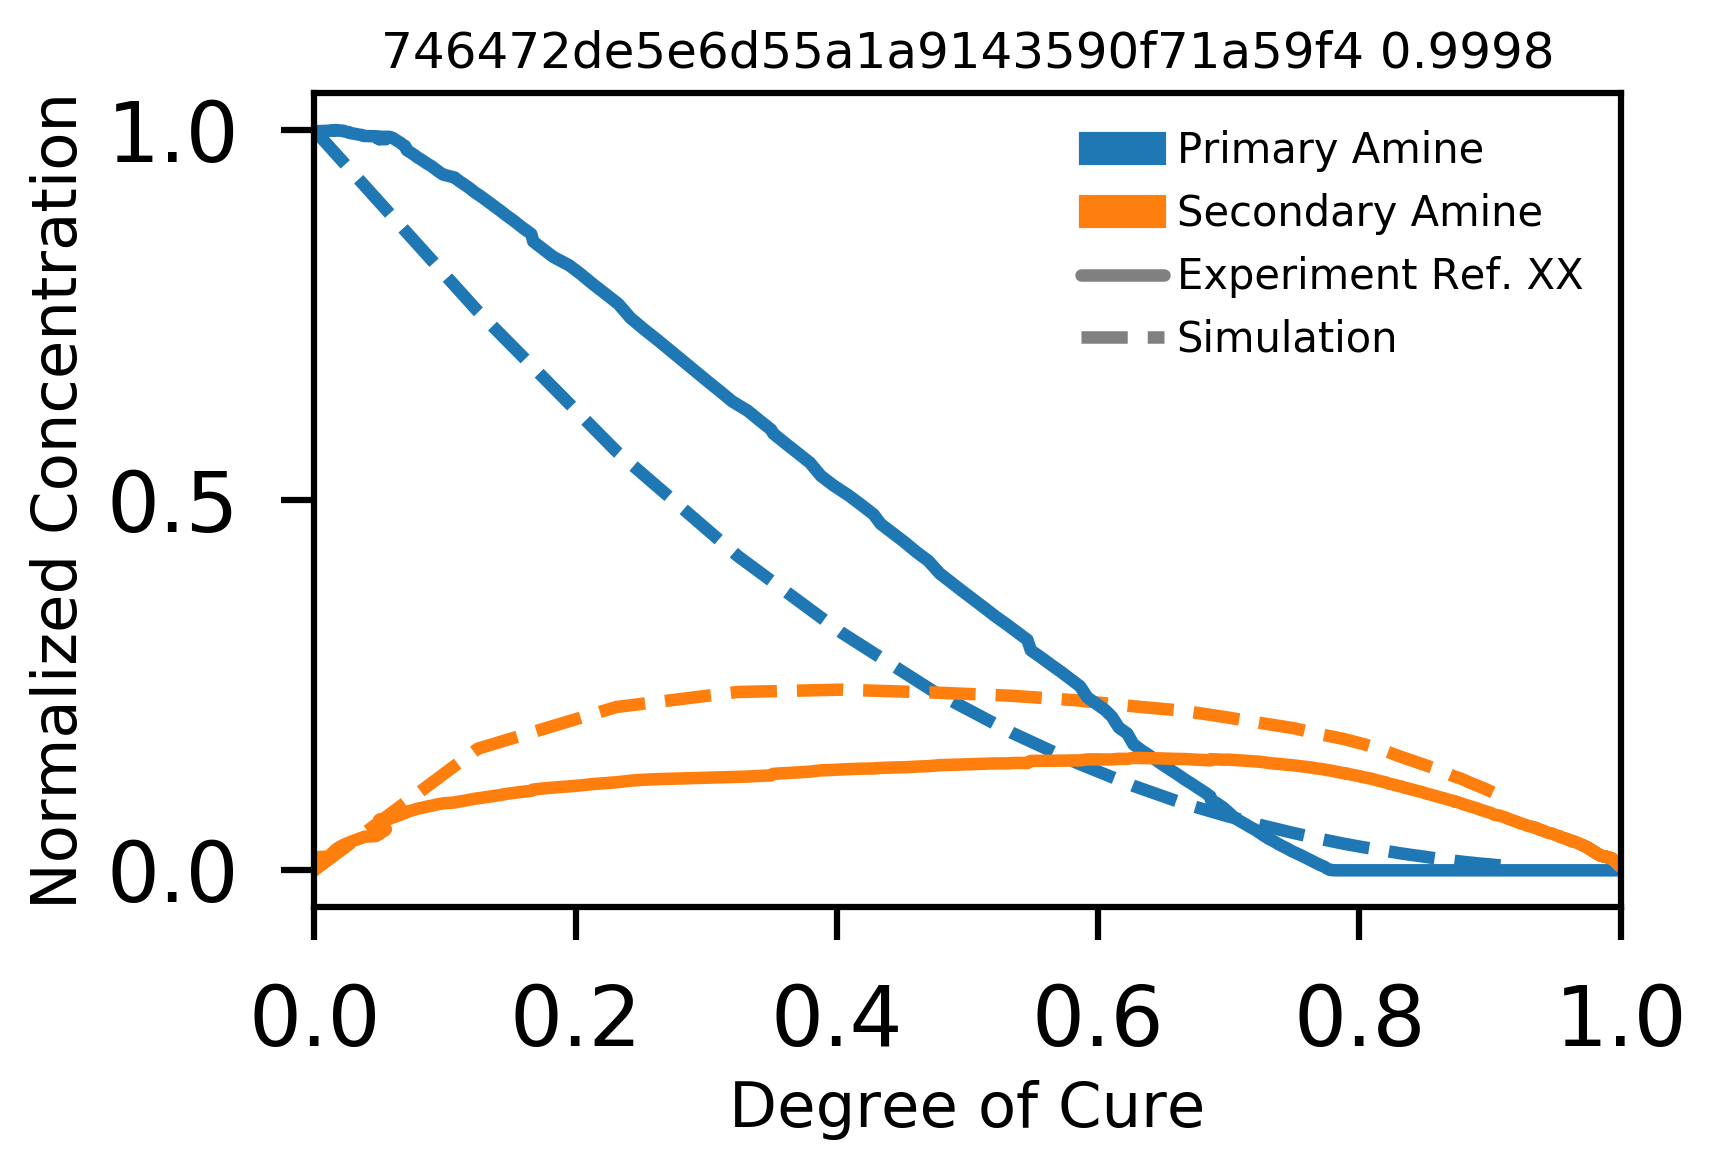

-----------
bb78f3204629eb62cad9b6c12ce858ba
R2 FO 0.9995905123854372
Ea 1.0
deltaT 1e-06
sec_bond_weight 1.0
% bonds per step 0.01
bond period 10


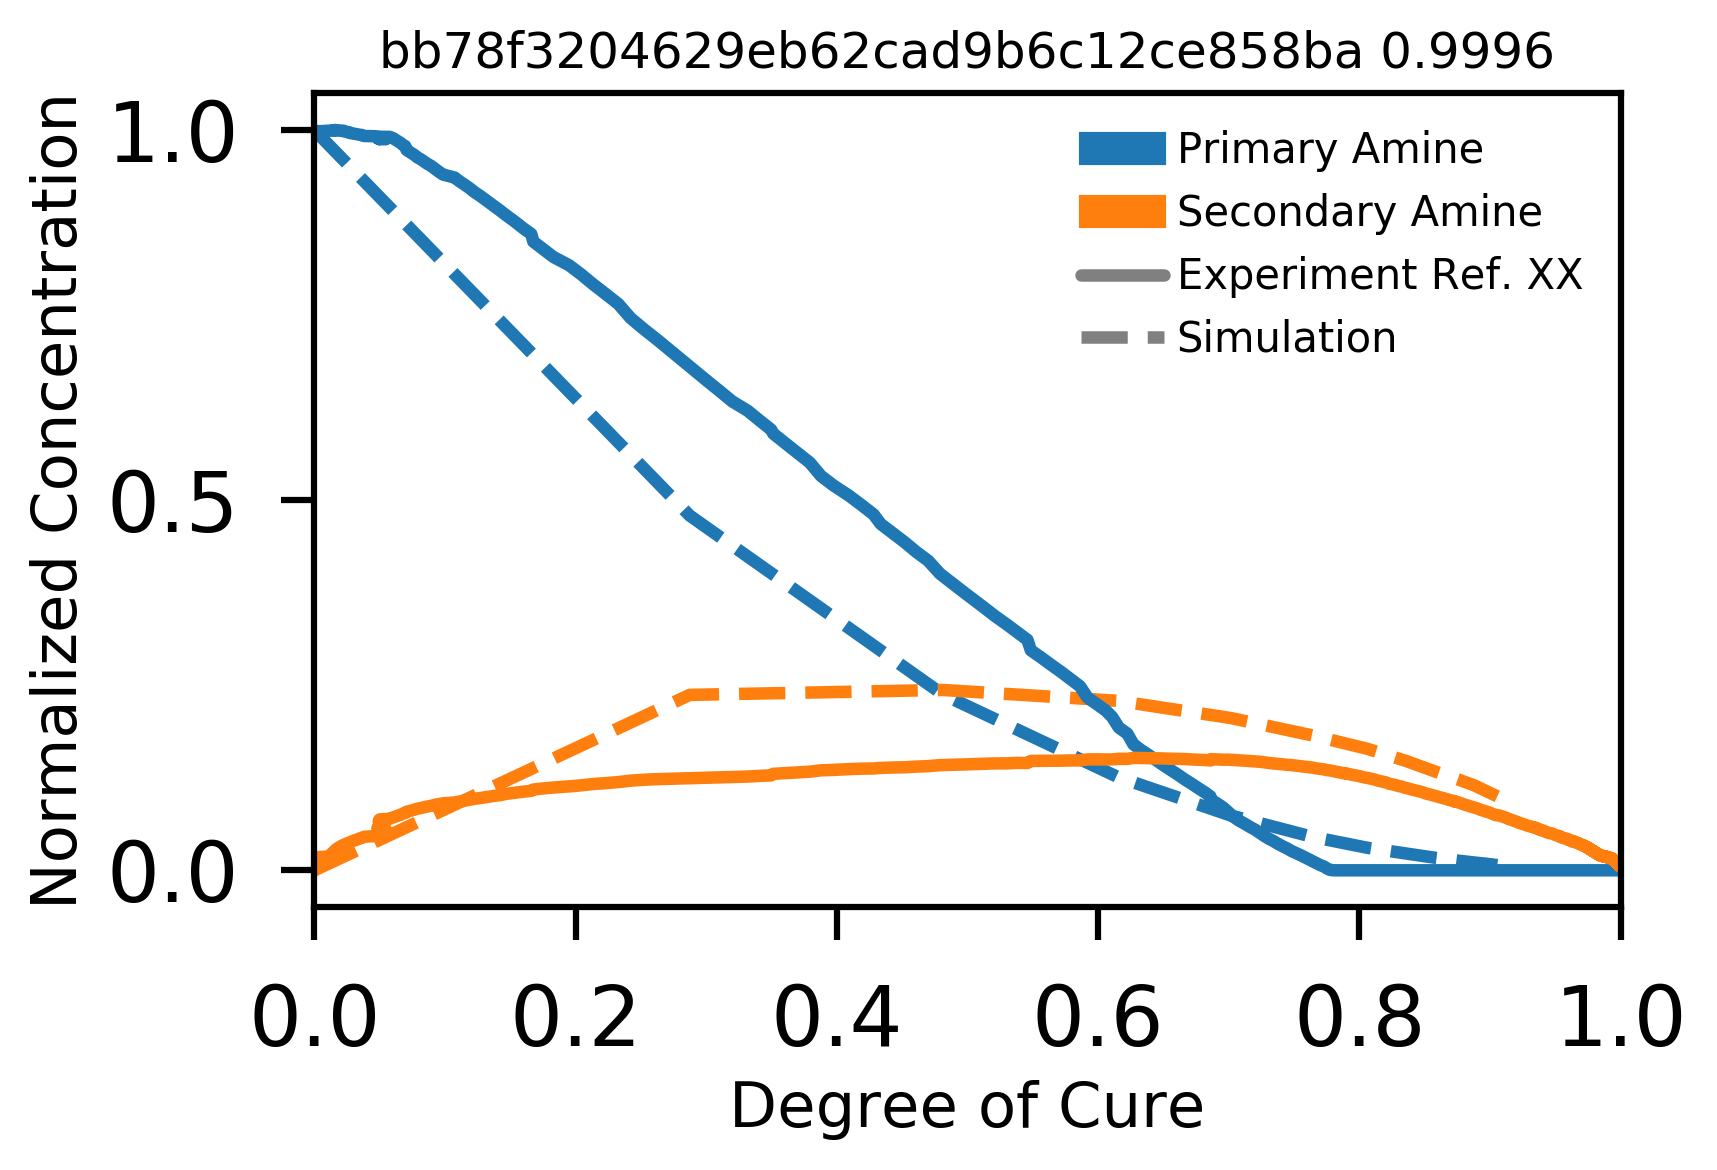

-----------
0a9512685a5fe7dbd871a8a69799bcf6
R2 FO 0.9997257241737306
Ea 1.0
deltaT 1e-06
sec_bond_weight 1.0
% bonds per step 0.01
bond period 100


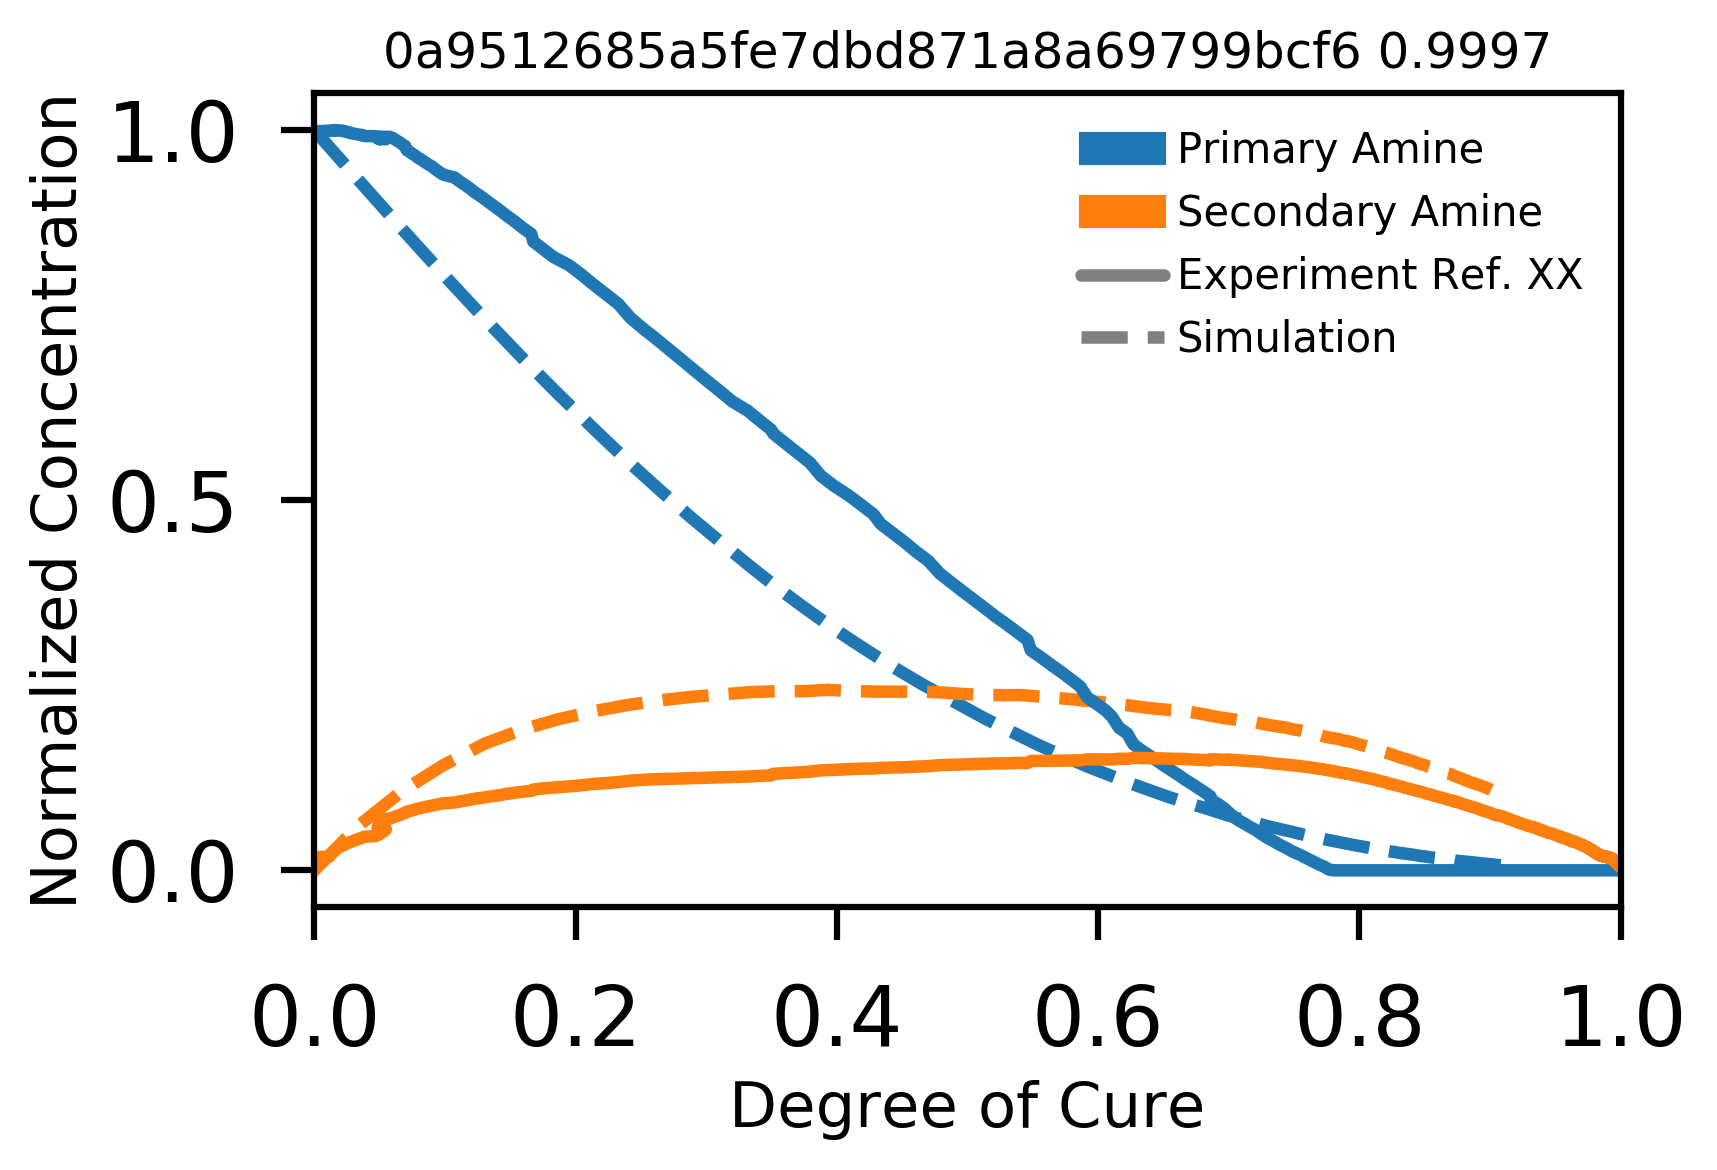

-----------
83dce0923e3d36b254a7a010047fb1f3
R2 FO 0.9995837356833435
Ea 1.0
deltaT 1e-06
sec_bond_weight 1.0
% bonds per step 0.1
bond period 100


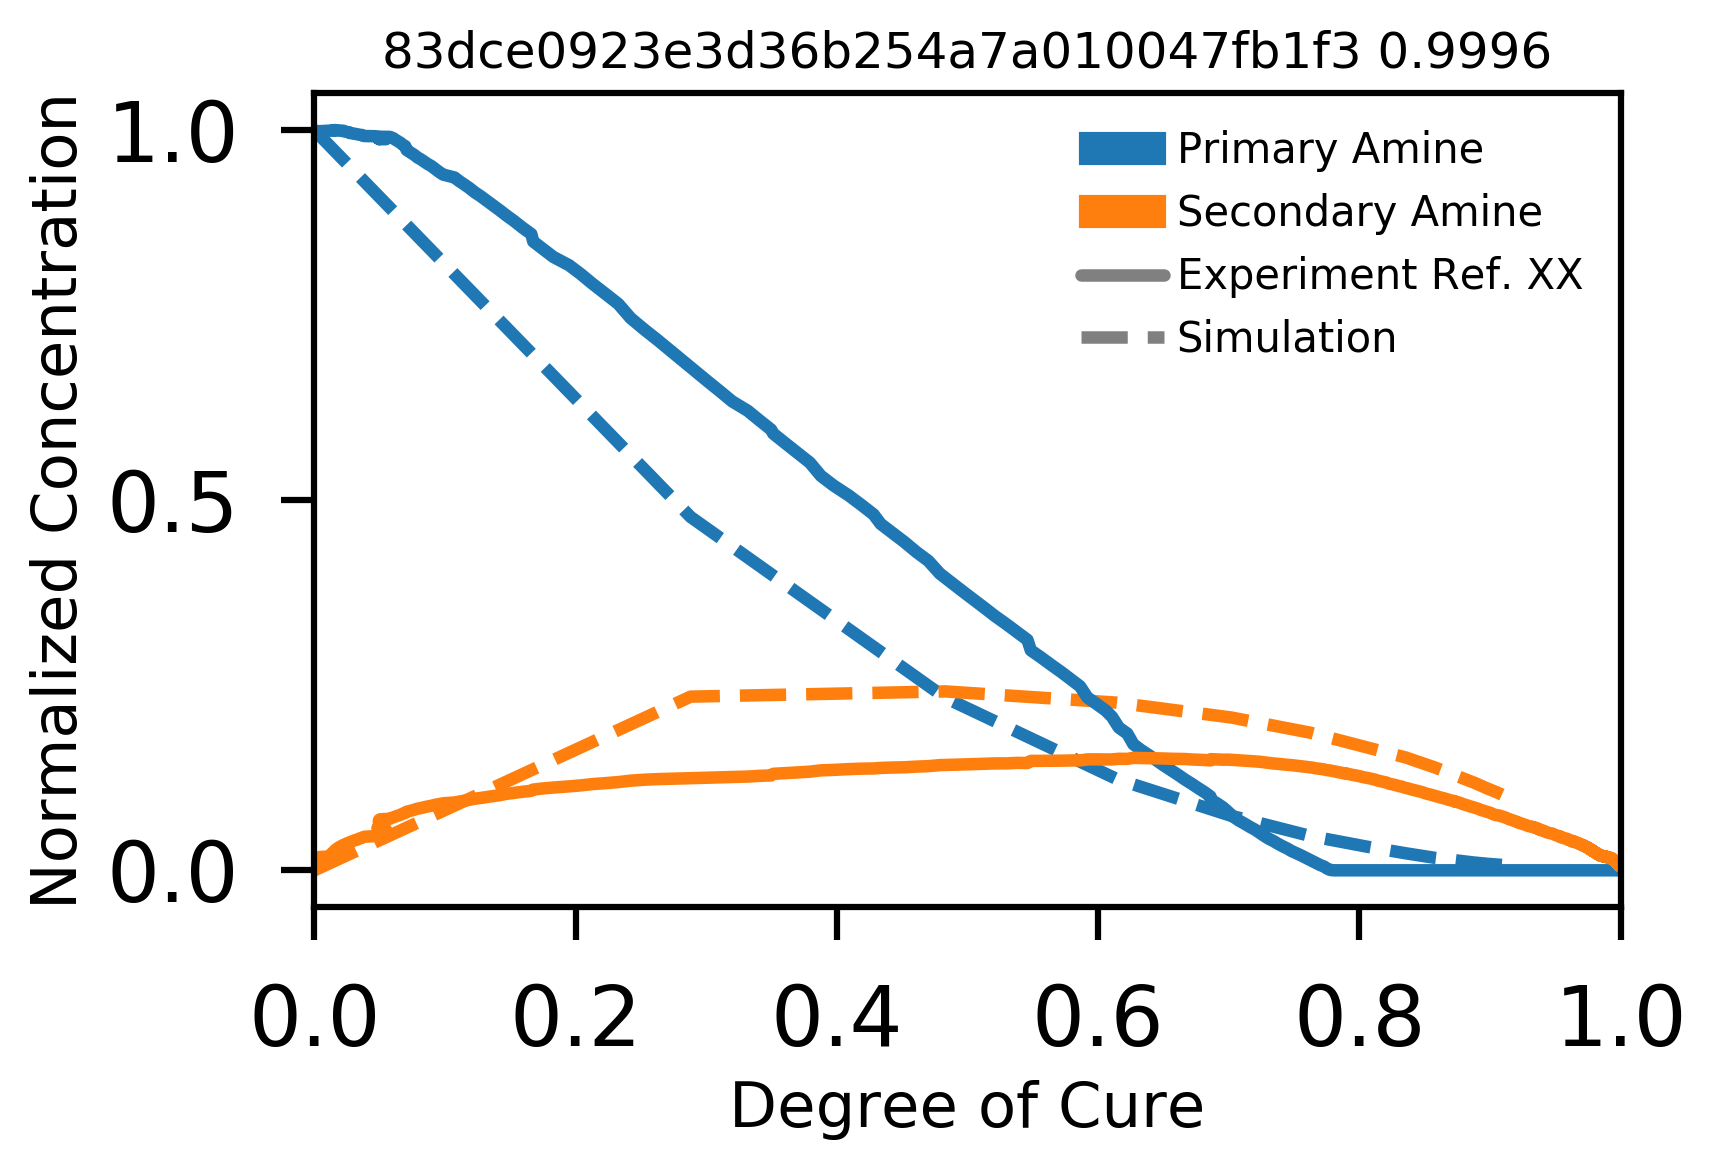

-----------
0b467ec2dc53db07d7549d8774448478
R2 FO 0.9996993586282763
Ea 2.0
deltaT 1e-06
sec_bond_weight 1.0
% bonds per step 0.01
bond period 10


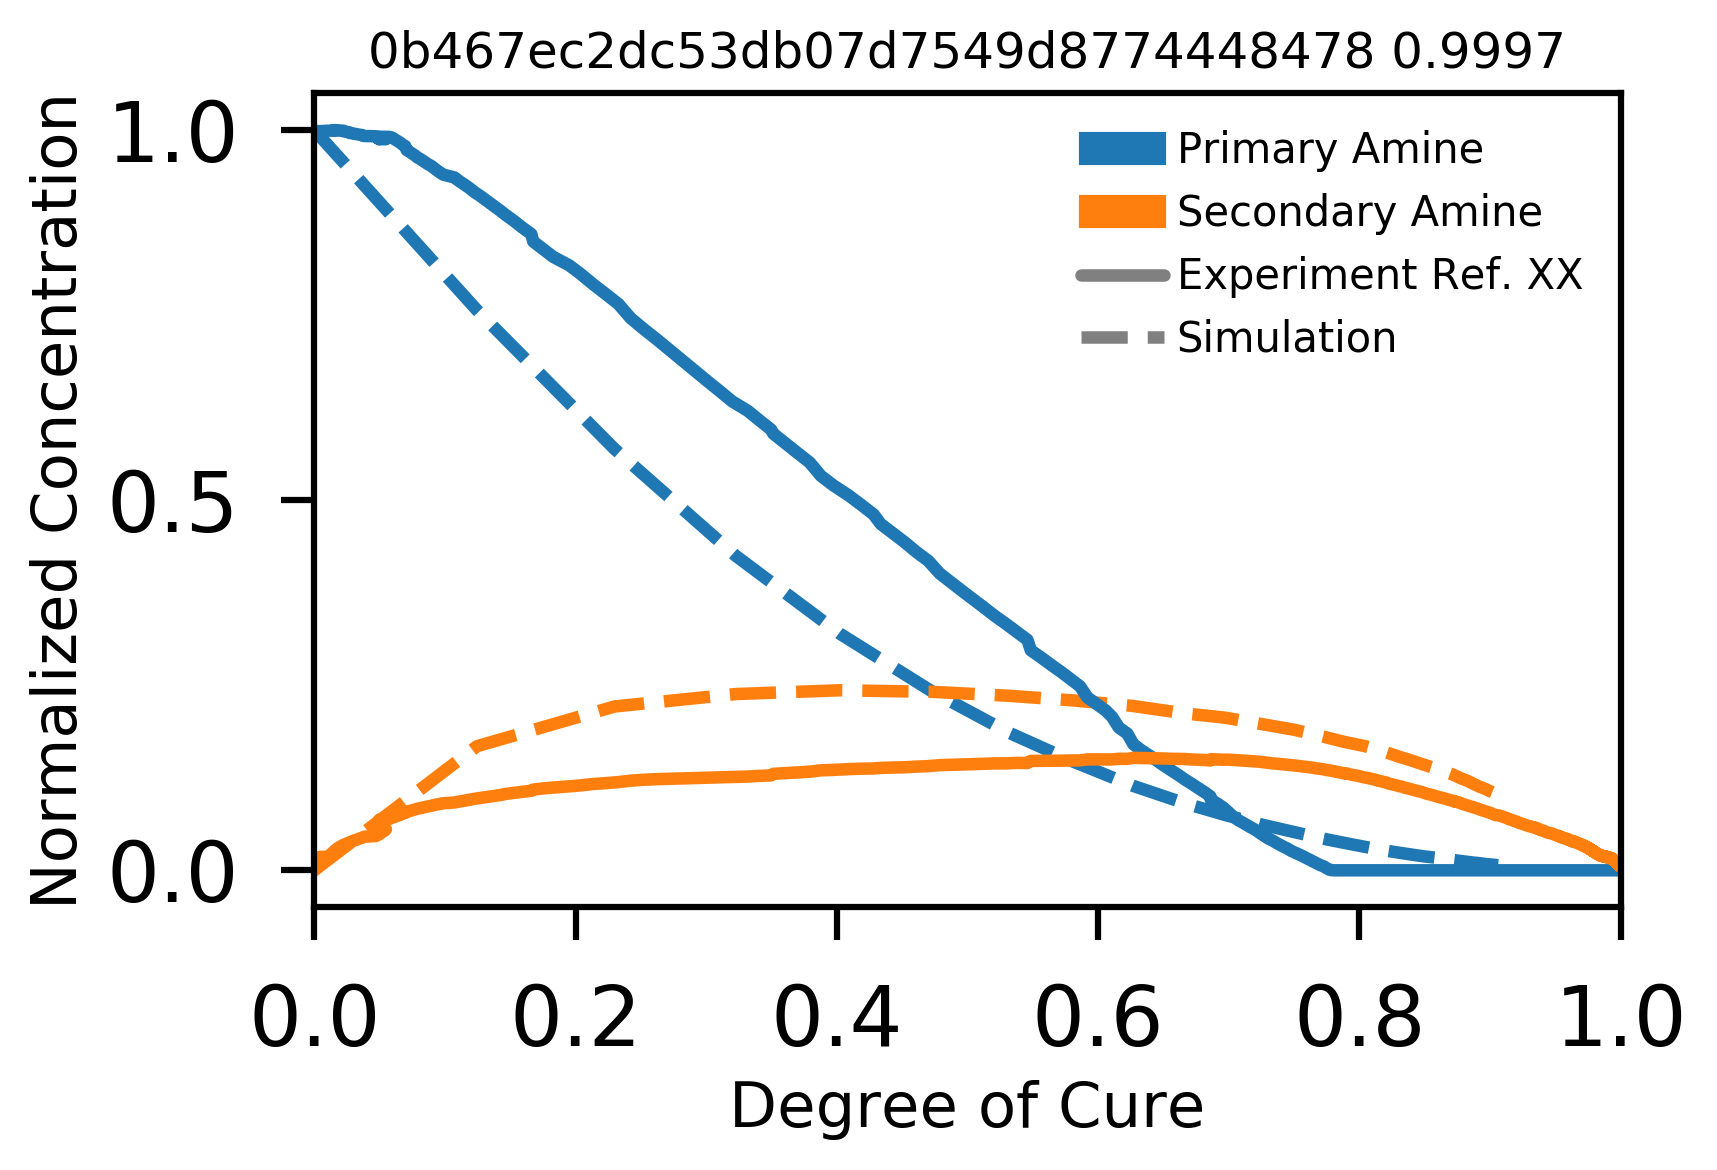

In [5]:
import pandas as pd
import signac
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
from collections import OrderedDict
%matplotlib inline
import matplotlib.patches as mpatches
import matplotlib.lines as mlines

path = "/home/mikehenry/epoxy-stuff/doc_test_enth"

project = signac.get_project(path)
jobs = project.find_jobs(filter={"bond": True}, doc_filter={"cure_percent":{"$gte":80}})

exp_data = np.load("../exp_data.npz")
doc, pa, sa, ta = exp_data["arr_0"], exp_data["arr_1"], exp_data["arr_2"], exp_data["arr_3"]


jobs = project.find_jobs(doc_filter={"cure_percent":{"$gte":80}})
R2s = []
for job in jobs:
    try:
        if job.doc.FO_model_R2 is not None:
            R2s.append((job.doc.FO_model_R2, job._id))
    except(AttributeError):
        continue
    
top_ten = [_[1] for _ in sorted(R2s)[-5:]]
'''
for job in jobs:
    if job._id in top_ten:
        print("-----------")
        print(job._id)
        print("R2 SAFO", job.doc.SAFO_model_R2)
        print("Ea", job.sp.activation_energy)
        print("deltaT", job.sp.deltaT)
        print("sec_bond_weight", job.sp.sec_bond_weight)
        print("% bonds per step" ,job.sp.percent_bonds_per_step)
        print("bond period", job.sp.bond_period)
'''
for job in jobs:
    if job._id in top_ten:
        try:
            df = pd.read_csv(job.fn("_test_species.log"), delimiter="\t")
        except(FileNotFoundError):
            continue
        print("-----------")
        print(job._id)
        print("R2 FO", job.doc.FO_model_R2)
        print("Ea", job.sp.activation_energy)
        print("deltaT", job.sp.deltaT)
        print("sec_bond_weight", job.sp.sec_bond_weight)
        print("% bonds per step" ,job.sp.percent_bonds_per_step)
        print("bond period", job.sp.bond_period)

        cure_fractions = np.asarray(df["#doc"])
        primaryA_cnts = np.asarray(df["primaryA"]) # 0
        secondaryA_cnts = np.asarray(df["secondaryA"]) # 1
        ternaryA_cnts = np.asarray(df["ternaryA"]) # 2 
        quarternaryA_cnts = np.asarray(df["quarternaryA"]) # 3
        fivernaryA_cnts = np.asarray(df["fivernaryA"]) # 4
        scale_factor = primaryA_cnts[0]*2
        primaryA_cnts=primaryA_cnts/scale_factor # 0
        secondaryA_cnts=secondaryA_cnts/scale_factor # 1
        ternaryA_cnts=ternaryA_cnts/scale_factor # 2
        quarternaryA_cnts=quarternaryA_cnts/scale_factor # 3
        fivernaryA_cnts=fivernaryA_cnts/scale_factor # 4

        P_high = primaryA_cnts*2+secondaryA_cnts+ternaryA_cnts
        P_low =  primaryA_cnts*2+secondaryA_cnts+ternaryA_cnts*0

        S_high = secondaryA_cnts + ternaryA_cnts*2 + quarternaryA_cnts
        S_low =  secondaryA_cnts + ternaryA_cnts*0 +quarternaryA_cnts

        T_high = ternaryA_cnts+quarternaryA_cnts+fivernaryA_cnts*2
        T_low = quarternaryA_cnts+fivernaryA_cnts*2

        plt.figure(dpi=300)

        #plt.plot(cure_fractions, P_high, color='#1f77b4', linestyle=":", label="high")
        plt.plot(cure_fractions, P_low, color='#1f77b4', linestyle="--", label="low")

        #plt.plot(cure_fractions, T_high, color="#2ca02c")
        #plt.plot(cure_fractions, T_low, color="#2ca02c")

        #plt.plot(cure_fractions, S_high, color="#ff7f0e", linestyle=":")
        plt.plot(cure_fractions, S_low, color="#ff7f0e", linestyle="--")




            #plt.fill_between(cure_fractions, S_low, S_high, label="Secondary",hatch="|||", alpha = 0.5, color="#ff7f0e")
            #plt.fill_between(cure_fractions, T_low, T_high, label="Tertiary",hatch="///", alpha = 0.5, color="#2ca02c")
            #plt.fill_between(cure_fractions, P_low, P_high, label="Primary",hatch="|", alpha = 0.8, color='#1f77b4')



        plt.plot(doc,pa, color='#1f77b4', linestyle='-', label="exp")
        plt.plot(doc,sa, color='#ff7f0e', linestyle='-')
        #plt.plot(doc,ta, color='#2ca02c', linestyle='--')

        primary = mpatches.Patch(color='#1f77b4', label='Primary Amine')
        seconday = mpatches.Patch(color='#ff7f0e', label='Secondary Amine')
        exp = mlines.Line2D([], [], color='grey', linestyle='-', label="Experiment Ref. XX")
        #high = mlines.Line2D([], [], color='grey', linestyle=':', label="Simulation High Count")
        low = mlines.Line2D([], [], color='grey', linestyle='--', label="Simulation")



        handles, labels = plt.gca().get_legend_handles_labels()
        by_label = OrderedDict(zip(labels, handles))
        plt.legend(by_label.values(), by_label.keys(), prop={'size': 15})
        plt.legend(handles=[primary,seconday,exp, low])


        #plt.title("activation_energy: {} \n bond_period: {} deltaT: {} percent_bonds_per_step: {} \n sec_bond_weight: {}".format(job.sp.activation_energy,
        #                                             job.sp.bond_period,
        #                                             job.sp.deltaT,
        #                                            job.sp.percent_bonds_per_step,
        #                                            job.sp.sec_bond_weight),
        #                                            )

        plt.title(str(job._id)+ " "+ str(round(job.doc.FO_model_R2,4)))
        plt.xlabel("Degree of Cure", size=15)
        plt.ylabel("Normalized Concentration", size=15)
        plt.xlim(0,1)
        plt.show()